In [ ]:
# hypothesis - theta0 + theta1*x + theta2*sin(8*x) + theta3*cos(8*x) + theta4*sin(16*x) + theta5*cos(16*x)+ theta6*sin(24*x) + theta7*cos(24*x)+ theta8*sin(32*x) + theta9*cos(32*x)+ theta10*sin(40*x) + theta11*cos(40*x)+ theta12*sin(48*x) + theta13*cos(48*x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
df = pd.read_csv('Project1Train.csv')

x = df[['x']]
xTuple = tuple(df[['x']].to_numpy())
y = df[['y']]
k = 8
depth = 0
option20 = True
if option20 == True:
  x = df[['x']][:20]
  xTuple = tuple(df[['x']].to_numpy())[:20]
  y = df[['y']][:20]

In [ ]:
def optimize(hypothesis, y, a, epochs, parameters):
    size = hypothesis.shape[0]
    hypothesis = hypothesis.to_numpy()
    weight = parameters["weight"] 
    y = y.to_numpy()
    y = y.reshape(size, 1)
    
    for i in range(epochs): 
      sigma = np.dot(hypothesis, weight)
      dW = 1/size*(np.dot(hypothesis.T, sigma - y))
      weight =  np.subtract(weight, a * dW)

    parameters["weight"] = weight
    return parameters, sigma

In [ ]:
def train(hypothesis, y, learning_rate, epochs):
  po, yhat = optimize(hypothesis, y, learning_rate, epochs , init_parameters)
  return po, yhat

In [ ]:
def designEquation(dataset,  k, depth = 6, option = 'hypothesis'):
  dataset.insert(0, '1', 1)
  for i in range(depth):
    if option == 'hypothesis':
      dataset['sin' + str((i+1)*k) + 'x'] = np.sin(dataset['x'].multiply((i+1)*k))
      dataset['cos' + str((i+1)*k) + 'x'] = np.cos(dataset['x'].multiply((i+1)*k))
  
  return dataset

In [ ]:
hypothesis = designEquation(x, k, depth, option  = 'hypothesis')

In [ ]:
init_parameters = {} 
init_parameters["weight"] = np.zeros((x.shape[1], 1), dtype=int)

In [ ]:
po, yhat = train(hypothesis, y, learning_rate = 0.02, epochs = 200)

In [ ]:
output = np.dot(x[:], po["weight"])


-11.816062824458257


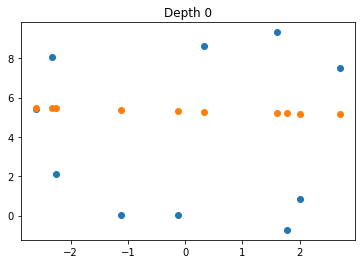

In [ ]:
rf = pd.read_csv('Project1Test.csv')
z = rf[['x']]
zTuple = tuple(rf[['x']].to_numpy())
newHypothesis = designEquation(z, k, depth, option  = 'hypothesis')
y_test = rf[['y']].to_numpy()
output2 = np.dot(newHypothesis, po["weight"])

fig = plt.figure()
plt.title("Depth " + str(depth))
plt.scatter(zTuple, y_test)
plt.scatter(zTuple, output2)
print(np.sum(y_test-output2))